<a href="https://colab.research.google.com/github/rafiafsan/Epileptic-Seizure-Detection-Using-Artificial-Intielligence-BUBT-NINS-/blob/main/Basic_PreProcessing_of_Raw_EEG_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
%pip install mne hu-neuro-pipeline

In [12]:
from mne import set_bipolar_reference
from mne.io import read_raw
from mne.preprocessing import ICA
from pipeline.datasets import get_erpcore

In [14]:
raw_file = "/content/DA0010A4_19_CHANNEL.set"
raw = read_raw(raw_file, preload=True)
raw

/tmp/ipython-input-4256183908.py:2: RuntimeWarning: Estimated head radius (11.1 cm) is above the 99th percentile for adult head size. Check if the montage_units argument is correct (the default is "mm", but your channel positions may be in different units).
  raw = read_raw(raw_file, preload=True)


<RawEEGLAB | DA0010A4_19_CHANNEL.set, 19 x 939000 (1878.0 s), ~136.1 MiB, data loaded>

In [15]:
raw.get_data()

array([[ 1.44335754e-04,  1.44433411e-04,  1.42089661e-04, ...,
         1.39648254e-04,  1.46972473e-04,  1.26074043e-04],
       [-9.30665741e-05, -9.63868866e-05, -1.01660324e-04, ...,
        -7.81421840e-07, -7.03142166e-06, -6.93376541e-06],
       [ 1.07404685e-06, -7.81421840e-07, -1.36735928e-06, ...,
         5.89841995e-05,  6.52341995e-05,  4.19920120e-05],
       ...,
       [ 4.20896683e-05,  4.32615433e-05,  4.19920120e-05, ...,
         2.65623264e-05,  2.14842014e-05,  1.40623274e-05],
       [-1.73829842e-05, -1.52345457e-05, -1.12306404e-05, ...,
        -5.17595291e-06, -7.32439041e-06, -1.03517342e-05],
       [ 1.49804504e-04,  1.47363098e-04,  1.47460754e-04, ...,
         2.50974827e-05,  2.28513889e-05,  2.32420139e-05]])

In [16]:
raw.get_data().shape

(19, 939000)

We can plot the raw data using the plot() method. We specify which time segment of the data to plot using the start and duration arguments. Here we plot 5 seconds of data, starting at 60 seconds.

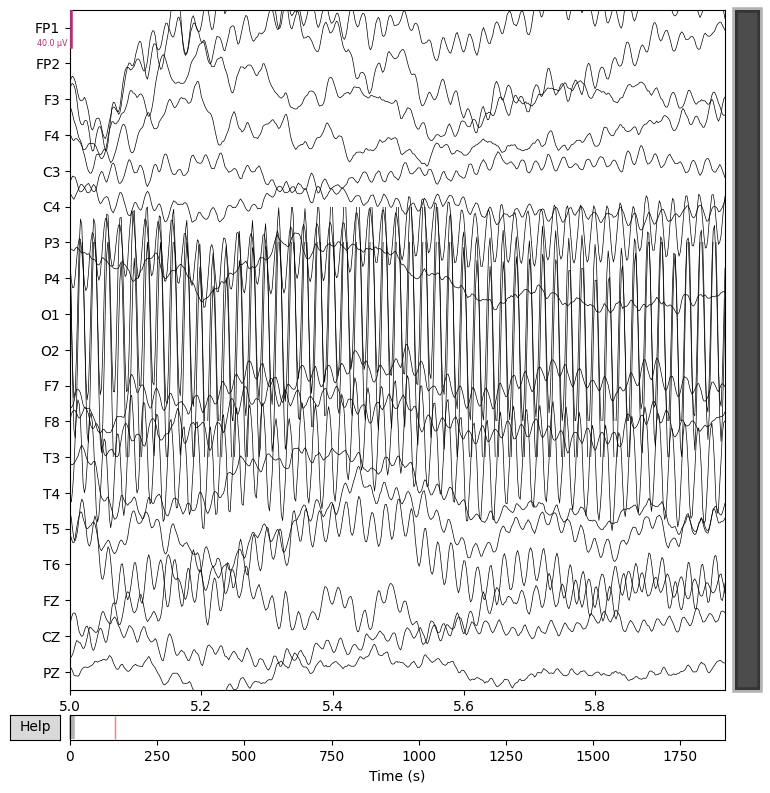

In [17]:
_ = raw.plot(start=5.0, duration=1.0)

Right now, MNE thinks that all channels are EEG channels. However, we know that some of them are actually EOG channels that record eye movements and blinks. We’ll use these to create new “virtual” EOG channels that pick up strong eye signals (vertical EOG [VEOG] = difference between above and below the eyes; horizontal EOG [HEOG] = difference between left and right side of the eyes). We explicitly set their channel type to 'eog' and drop the original channels, so that we are left with 30 EEG channels and 2 EOG channels.

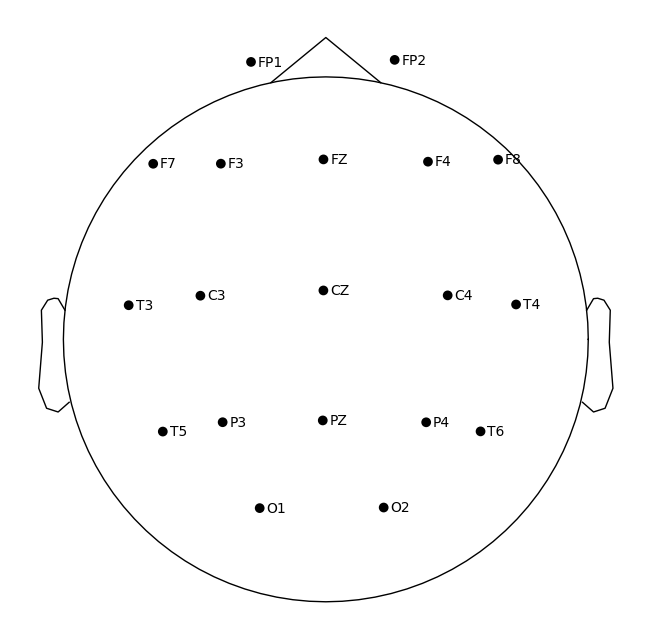

In [19]:
raw = raw.set_montage('standard_1020', match_case=False)
_ = raw.plot_sensors(show_names=True)

In [20]:
raw = set_bipolar_reference(raw, anode='FP1', cathode='FP2',
                            ch_name='EOG', drop_refs=False)

EEG channel type selected for re-referencing
Creating RawArray with float64 data, n_channels=1, n_times=939000
    Range : 0 ... 938999 =      0.000 ...  1877.998 secs
Ready.
Added the following bipolar channels:
EOG


In [21]:
raW = raw.set_channel_types({'EOG': 'eog'})

In [22]:
raw = raw.drop_channels(['FP1', 'FP2'])

In [23]:
raw

<RawEEGLAB | DA0010A4_19_CHANNEL.set, 18 x 939000 (1878.0 s), ~129.0 MiB, data loaded>

Filtering is a common preprocessing step that is used to remove parts of the EEG signal that are unlikely to contain brain activity of interest. There are four different types of filters:

A high-pass filter removes low-frequency noise (e.g., slow drifts due to sweat or breathing)

A low-pass filter removes high-frequency noise (e.g., muscle activity)

A band-pass filter combines a high-pass and a low-pass filter

A band-stop filter removes a narrow band of frequencies (e.g., 50 Hz line noise)

We first apply a high-pass filter at 0.1 Hz to remove slow drifts and plot the filtered data.

Filtering raw data in 2 contiguous segments
Setting up high-pass filter at 0.1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Filter length: 16501 samples (33.002 s)



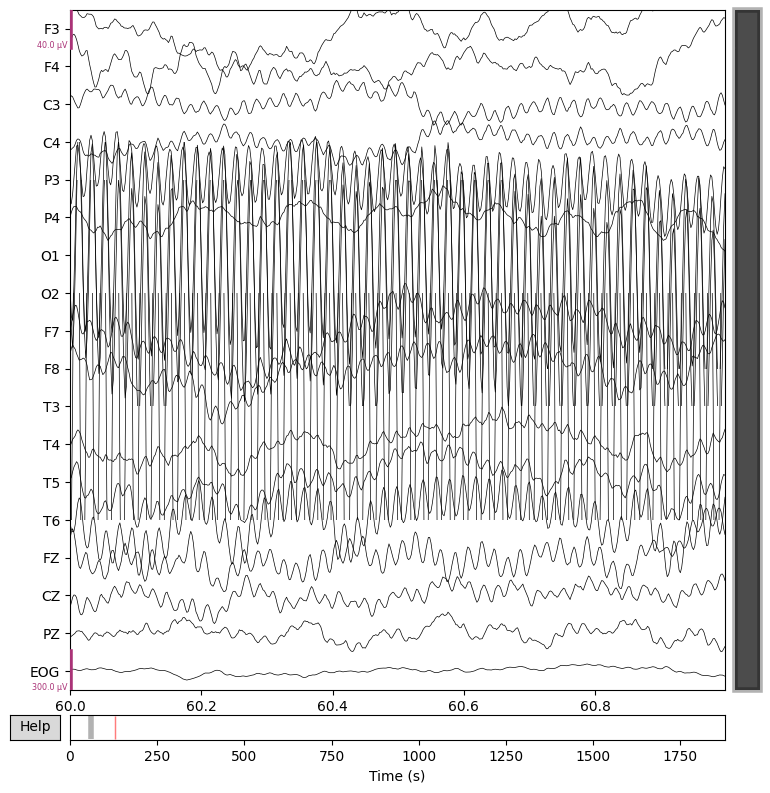

In [25]:
raw = raw.filter(l_freq=0.1, h_freq=None)
_ = raw.plot(start=60.0, duration=1.0)

Next, we apply a low-pass filter at 30 Hz to remove high-frequency noise and plot the data again.

Filtering raw data in 2 contiguous segments
Setting up low-pass filter at 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 221 samples (0.442 s)



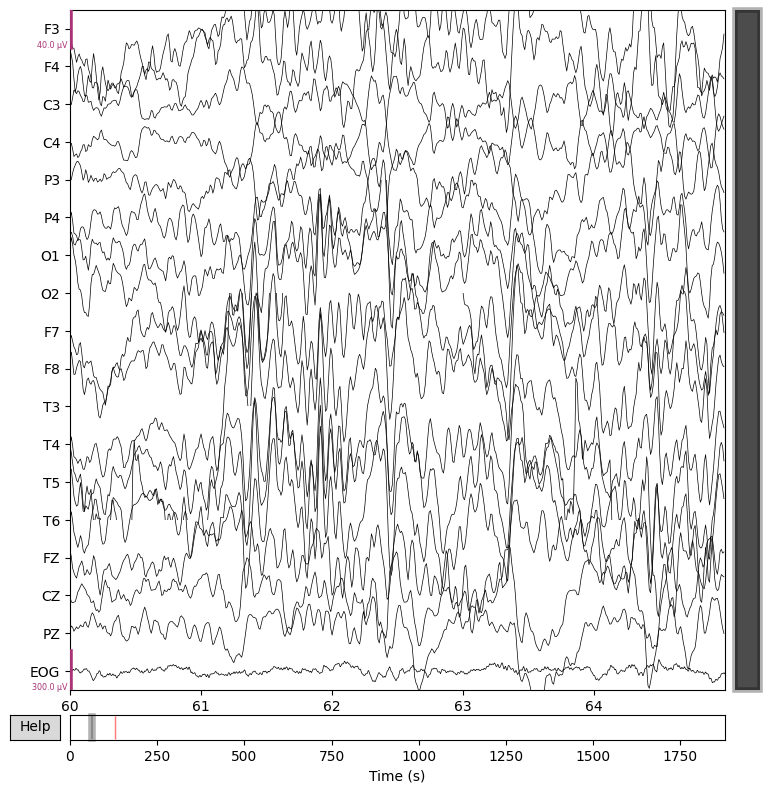

In [26]:
raw = raw.filter(l_freq=None, h_freq=30.0)
_ = raw.plot(start=60.0, duration=5.0)

Filtering raw data in 2 contiguous segments
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 1651 samples (3.302 s)

Fitting ICA to data using 17 channels (please be patient, this may take a while)
Selecting by number: 15 components
Fitting ICA took 23.6s.


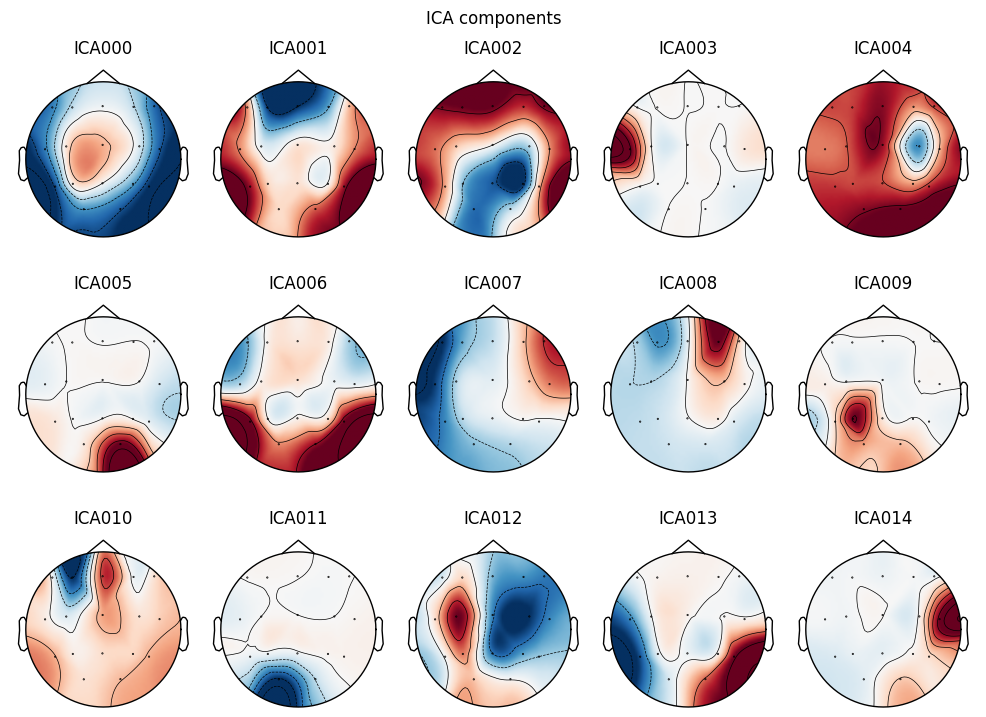

In [27]:
raw_copy = raw.copy().filter(l_freq=1.0, h_freq=None)
ica = ICA(n_components=15)
ica = ica.fit(raw_copy)
_ = ica.plot_components()

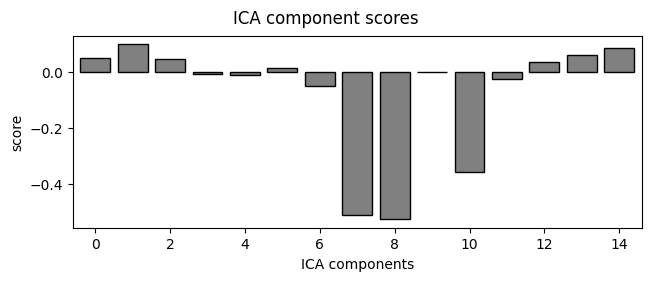

In [28]:
eog_indices, eog_scores = ica.find_bads_eog(raw, ch_name=['EOG'],
                                            verbose=False)
ica.exclude = eog_indices
_ = ica.plot_scores(eog_scores)

Applying ICA to Raw instance
    Transforming to ICA space (15 components)
    Zeroing out 0 ICA components
    Projecting back using 17 PCA components


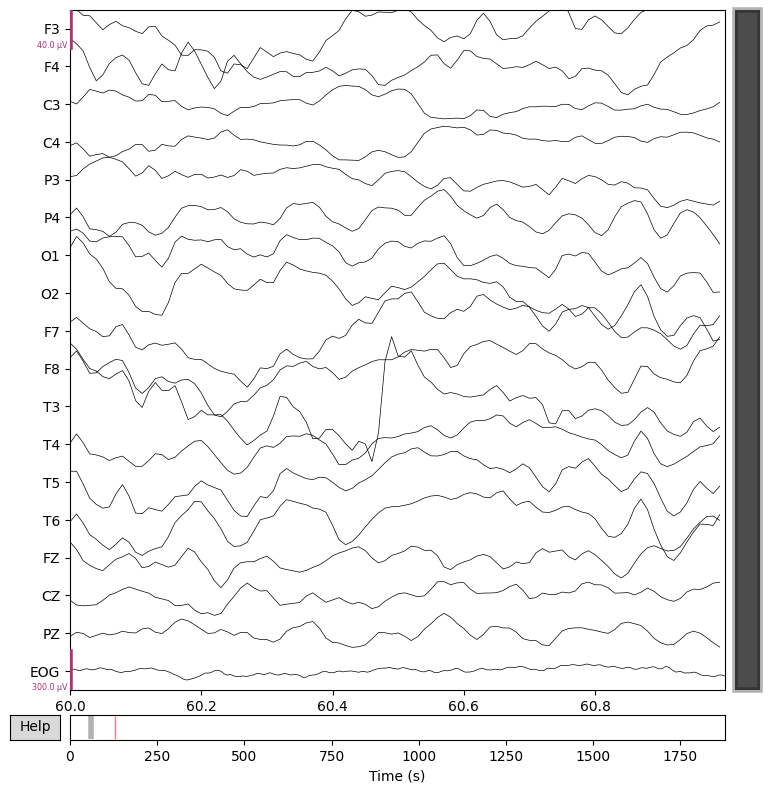

In [32]:
raw = ica.apply(raw)
_ = raw.plot(start=60.0, duration=1.0)

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.


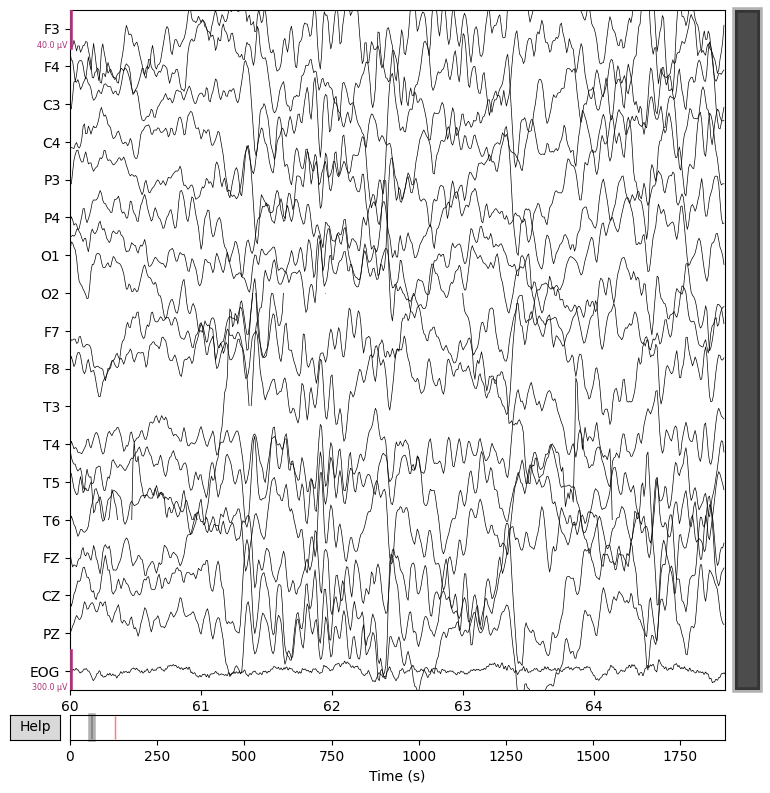

In [33]:
raw = raw.set_eeg_reference('average')
_ = raw.plot(start=60.0, duration=5.0)